In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

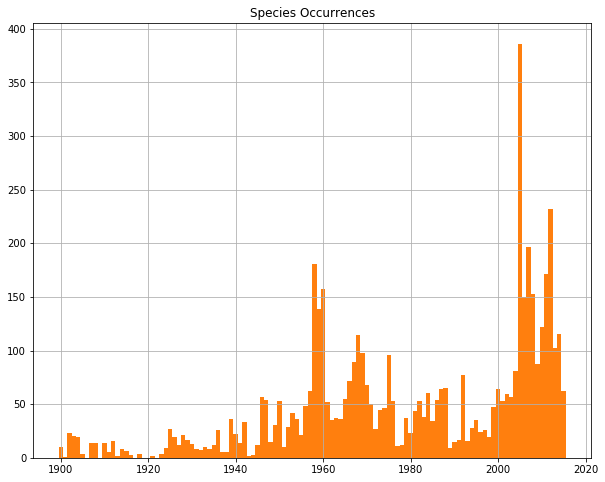

In [7]:
original_dataset = pd.read_csv('C:\\Users\\amaci\\Desktop\\FEI\\Mestrado\\PME406\\Trab Final\Datasets\\malaria-mosquito\\Africa_Vectors_database_1898-2016_cluster.csv', encoding='utf-8', sep=';')

derivate_dataset = original_dataset.loc[original_dataset['YeStart'] == original_dataset['YeEnd']]

hist_dataset = derivate_dataset['YeStart']
hist_dataset.reset_index(drop=True)

#hist = np.histogram(hist_dataset)
hist = hist_dataset.hist(figsize=(10,8), bins=np.arange(hist_dataset.min(), hist_dataset.max()+1), align='left', color = 'C1')
hist.set_title('Species Occurrences')
plt.savefig('spec_occurr.png')
plt.show()

comp_report_dataset = hist_dataset.where(hist_dataset >= 2000)
comp_report_dataset = comp_report_dataset.where(comp_report_dataset <= 2014)
comp_report_dataset.dropna(inplace=True)

count_occurr = comp_report_dataset.value_counts()

df_count_occurr = pd.DataFrame(comp_report_dataset.value_counts().reset_index())
df_count_occurr.columns = ['year', 'occurrences']
df_count_occurr['year'] = df_count_occurr['year'].astype(int)
df_count_occurr = df_count_occurr.sort_values(by = ['year'], ascending = True)

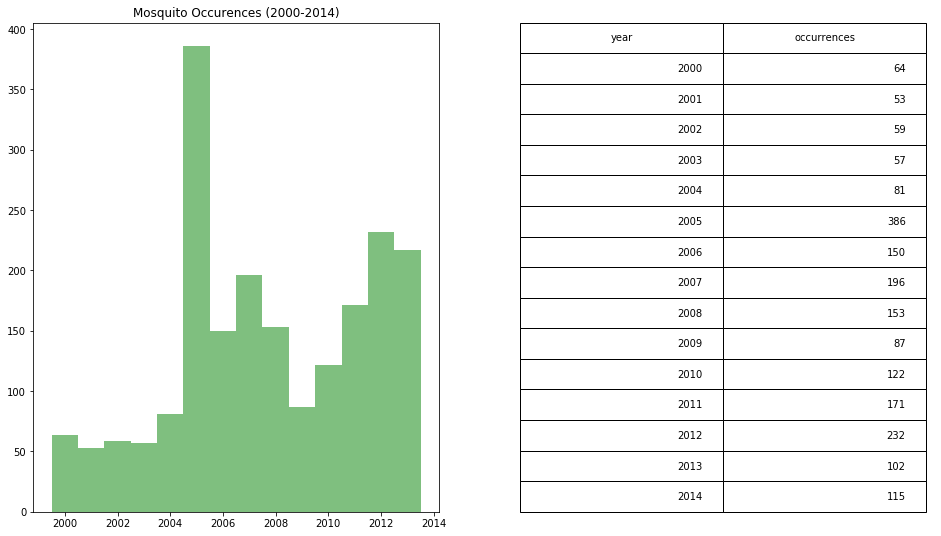

In [8]:
fig = plt.figure(figsize=(16,9))

plot_r = fig.add_subplot(121)
plt.title('Mosquito Occurences (2000-2014)')
plot_r.hist(comp_report_dataset, bins=np.arange(comp_report_dataset.min(), comp_report_dataset.max()+1), align='left', color = 'g', alpha = .5)
plt.savefig('occurr_2000_2014.png')

bbox = [0, 0, 1, 1]

plot_l = fig.add_subplot(122)
plot_l.axis('off')
tab = plot_l.table(cellText = df_count_occurr.values, bbox=bbox, colLabels= df_count_occurr.columns)

plt.show()

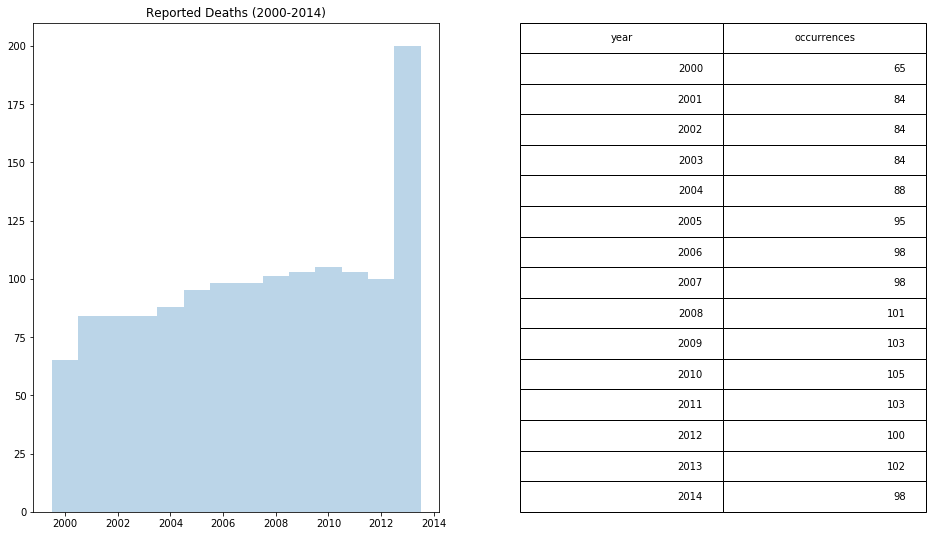

In [14]:
report_dataset = pd.read_csv('C:\\Users\\amaci\\Desktop\\FEI\\Mestrado\\PME406\\Trab Final\Datasets\\the-fight-against-malaria\\reported_deaths.csv', encoding='latin1', sep=',')

report_dataset = report_dataset['YEAR (DISPLAY)']
count_report = report_dataset.value_counts()

df_count_report = pd.DataFrame(report_dataset.value_counts().reset_index())
df_count_report.columns = ['year', 'occurrences']
#c
df_count_report = df_count_report.sort_values(by = ['year'], ascending = True)
#series_count_occurr = series_count_occurr.reset_index(drop=True)

fig = plt.figure(figsize=(16,9))

plot_rr = fig.add_subplot(121)
plt.title('Reported Deaths (2000-2014)')
plot_rr.hist(report_dataset, bins=np.arange(report_dataset.min(), report_dataset.max()+1), align='left', alpha = 0.3)
plt.savefig('rep_dt.png')

plot_lr = fig.add_subplot(122)
plot_lr.axis('off')
tab = plot_lr.table(cellText = df_count_report.values, bbox=bbox, colLabels= df_count_report.columns)
plt.show()

In [136]:
correlation_p = df_count_occurr['occurrences'].corr(df_count_report['occurrences'], method="pearson")
print('\n Pearson')
print(correlation_p)

correlation_s = df_count_occurr['occurrences'].corr(df_count_report['occurrences'], method="spearman")
print('\n Spearman')
print(correlation_s)


 Pearson
0.6955552468464579

 Spearman
0.9919317372826475
